In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import tensorflow

In [2]:
root_dir = '../input/gtsrb-german-traffic-sign/'
directory = '../input/gtsrb-german-traffic-sign/Train/'
try:
    os.makedirs('/kaggle/working/Train/')
    os.makedirs('/kaggle/working/Valid/')
except:
    print('Already Created')

In [3]:
classes = os.listdir(directory)
num_classes = len(classes)
print(f'{classes},\n number: {num_classes}')

['7', '17', '19', '22', '2', '35', '23', '10', '5', '36', '20', '27', '41', '39', '32', '25', '42', '8', '38', '12', '0', '31', '34', '18', '28', '16', '13', '26', '15', '3', '1', '30', '14', '4', '9', '21', '40', '6', '11', '37', '33', '29', '24'],
 number: 43


In [4]:
source_path=[directory +f'{a}' for a in classes]
print(source_path)

['../input/gtsrb-german-traffic-sign/Train/7', '../input/gtsrb-german-traffic-sign/Train/17', '../input/gtsrb-german-traffic-sign/Train/19', '../input/gtsrb-german-traffic-sign/Train/22', '../input/gtsrb-german-traffic-sign/Train/2', '../input/gtsrb-german-traffic-sign/Train/35', '../input/gtsrb-german-traffic-sign/Train/23', '../input/gtsrb-german-traffic-sign/Train/10', '../input/gtsrb-german-traffic-sign/Train/5', '../input/gtsrb-german-traffic-sign/Train/36', '../input/gtsrb-german-traffic-sign/Train/20', '../input/gtsrb-german-traffic-sign/Train/27', '../input/gtsrb-german-traffic-sign/Train/41', '../input/gtsrb-german-traffic-sign/Train/39', '../input/gtsrb-german-traffic-sign/Train/32', '../input/gtsrb-german-traffic-sign/Train/25', '../input/gtsrb-german-traffic-sign/Train/42', '../input/gtsrb-german-traffic-sign/Train/8', '../input/gtsrb-german-traffic-sign/Train/38', '../input/gtsrb-german-traffic-sign/Train/12', '../input/gtsrb-german-traffic-sign/Train/0', '../input/gtsrb-g

In [5]:
classes_dir=[f'{a}_dir' for a in classes]
classes_dir

['7_dir',
 '17_dir',
 '19_dir',
 '22_dir',
 '2_dir',
 '35_dir',
 '23_dir',
 '10_dir',
 '5_dir',
 '36_dir',
 '20_dir',
 '27_dir',
 '41_dir',
 '39_dir',
 '32_dir',
 '25_dir',
 '42_dir',
 '8_dir',
 '38_dir',
 '12_dir',
 '0_dir',
 '31_dir',
 '34_dir',
 '18_dir',
 '28_dir',
 '16_dir',
 '13_dir',
 '26_dir',
 '15_dir',
 '3_dir',
 '1_dir',
 '30_dir',
 '14_dir',
 '4_dir',
 '9_dir',
 '21_dir',
 '40_dir',
 '6_dir',
 '11_dir',
 '37_dir',
 '33_dir',
 '29_dir',
 '24_dir']

In [6]:
for cl_dir,cl_path in zip(classes_dir,source_path):
    print(cl_dir,': ',len(os.listdir(cl_path)))

7_dir :  1440
17_dir :  1110
19_dir :  210
22_dir :  390
2_dir :  2250
35_dir :  1200
23_dir :  510
10_dir :  2010
5_dir :  1860
36_dir :  390
20_dir :  360
27_dir :  240
41_dir :  240
39_dir :  300
32_dir :  240
25_dir :  1500
42_dir :  240
8_dir :  1410
38_dir :  2070
12_dir :  2100
0_dir :  210
31_dir :  780
34_dir :  420
18_dir :  1200
28_dir :  540
16_dir :  420
13_dir :  2160
26_dir :  600
15_dir :  630
3_dir :  1410
1_dir :  2220
30_dir :  450
14_dir :  780
4_dir :  1980
9_dir :  1470
21_dir :  330
40_dir :  360
6_dir :  420
11_dir :  1320
37_dir :  210
33_dir :  689
29_dir :  270
24_dir :  270


In [7]:
train = '/kaggle/working/Train'
valid = '/kaggle/working/Valid'

In [8]:
import glob
from sklearn.model_selection import train_test_split

def split(data_path, train, validation, split_size=0.1):
    folders = os.listdir(data_path)
    for folder in folders:
        fullpath = os.path.join(data_path, folder)
        image = glob.glob(os.path.join(fullpath,'*.png'))
       
        X_train, X_valid = train_test_split(image, test_size = split_size)
       
        for x in X_train:
         #   print(x)
            path_to_folder = os.path.join(train,folder)
           
            if not os.path.isdir(path_to_folder):
                os.makedirs(path_to_folder)
            shutil.copy(x,path_to_folder)
       
        for y in X_valid:
            path_to_folder = os.path.join(validation, folder)
            if not os.path.isdir(path_to_folder):
                os.makedirs(path_to_folder)
            shutil.copy(y, path_to_folder)

In [9]:
split(directory, train=train,validation=valid,split_size = 0.2)

In [10]:
import pandas as pd

df = pd.read_csv('../input/gtsrb-german-traffic-sign/Test.csv')
target = df['ClassId']
df.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
5,52,56,5,5,47,51,38,Test/00005.png
6,147,130,12,12,135,119,18,Test/00006.png
7,32,33,5,5,26,28,12,Test/00007.png
8,45,50,6,5,40,45,25,Test/00008.png
9,81,86,7,7,74,79,35,Test/00009.png


In [11]:
try:
    os.makedirs('kaggle/working/Test/')
except:
    print('Already Created')

In [12]:
test = 'kaggle/working/Test/'

In [13]:
def prepare_test(csv_path, src, dst):
    with open(csv_path, "r") as f:
        next(f)
        for line in f:
            split_line = line.split(',')
            image = split_line[-1][:-1]
            label = split_line[-2]
            #print(image, label)
            destination = dst + label
            if not os.path.isdir(destination):
                os.makedirs(destination)
            shutil.copy(src + image,destination)
            
csv_path = '../input/gtsrb-german-traffic-sign/Test.csv'
src = root_dir
dst = test
#Commented to not run again
prepare_test(csv_path, src, dst)

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, MaxPooling2D, Flatten, BatchNormalization, GlobalAvgPool2D, Dropout, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras import Model

In [15]:
width, height = 60, 60
batch_size = 128
num_classes = 43
classes_indices = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10','11','12','13','14','15','16','17','18','19',
                   '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', 
                   '35', '36', '37', '38', '39', '40', '41', '42']

In [16]:
def create_generators(train, valid, test):
    train_data_generator = ImageDataGenerator(rescale=1/255, data_format='channels_last', dtype=tf.float32)

    train_generator = train_data_generator.flow_from_directory(
        directory=train,
        target_size=(height, width),
        color_mode="rgb",
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=True,
        seed=42,
        classes=classes_indices 
    )

    valid_data_generator = ImageDataGenerator(rescale=1/255, dtype=tf.float32, data_format='channels_last')
    valid_generator = valid_data_generator.flow_from_directory(
        directory=valid,
        target_size=(height, width),
        color_mode="rgb",
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=True,
        seed=42,
        classes=classes_indices 
    )

    test_data_generator = ImageDataGenerator(rescale=1/255, dtype=tf.float32, data_format='channels_last')
    test_generator = test_data_generator.flow_from_directory(
        directory=test,
        target_size=(height, width),
        color_mode="rgb",
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=False,
        classes=classes_indices 
    )
    
    return (train_generator, valid_generator, test_generator)

train_generator, valid_generator, test_generator = create_generators(train, valid, test)

Found 31367 images belonging to 43 classes.
Found 7842 images belonging to 43 classes.
Found 12630 images belonging to 43 classes.


In [17]:
class ConvBlock(tensorflow.keras.layers.Layer):
    def __init__(self, channels, **kwargs):
        super(ConvBlock, self).__init__(**kwargs)
        self.channels = channels
        
    def build(self, input_shape):
        self.main_layers=[
            Conv2D(self.channels[0], 3, padding="same", activation='relu', input_shape=input_shape),
            Conv2D(self.channels[0], 3, padding="same", activation='relu'),
            MaxPooling2D(2),
            Dropout(0.2),
            Conv2D(self.channels[1], 3, padding="same", activation='relu'),
            Conv2D(self.channels[1], 3, padding="same", activation='relu'),
            MaxPooling2D(2),
            Dropout(0.3),
            Conv2D(self.channels[2], 3, padding="same", activation='relu'),
            Conv2D(self.channels[2], 3, padding="same", activation='relu'),
            MaxPooling2D(2),
            Dropout(0.3)
        ]

    def call(self, inputs):
        x = inputs
        for layer in self.main_layers:
            x = layer(x)
        return x
    
    def get_config(self):
        config = super(ConvBlock, self).get_config()
        config.update({"channels": self.channels})
        return channels

In [18]:
class FullModel(tensorflow.keras.Model):
    def __init__(self, channels, num_classes=43):
        super().__init__()
        self.channels = channels
        self.drop = Dropout(0.3)        
        self.main_layers = [
            ConvBlock(self.channels),
            Flatten(),
            Dense(1024, activation = 'relu'),
            Dropout(0.5),
            Dense(512, activation = 'relu'),
            Dropout(0.5),
            Dense(num_classes, activation='softmax')
        ]
        
    def call(self, inputs):
        x = inputs
        for layer in self.main_layers:
            x = layer(x)
        return x
    
    def summary(self):
        x = Input(shape=(60, 60, 3))
        model = Model(inputs=[x], outputs=self.call(x))
        return model.summary()
    
    def get_config(self):
        return {"channels": self.channels}
    
    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [19]:
channels = [32, 64, 128, 256]
input_shape = (60, 60, 3)
model = FullModel(channels, num_classes)

2021-11-22 14:03:21.928486: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-22 14:03:22.068463: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-22 14:03:22.069200: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-22 14:03:22.070413: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60, 60, 3)]       0         
_________________________________________________________________
conv_block (ConvBlock)       (None, 7, 7, 128)         287008    
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              6423552   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0     

In [21]:
#We can add a callback anyway.
loss = tensorflow.keras.losses.CategoricalCrossentropy()

opt = tensorflow.keras.optimizers.Adam()
model.compile(optimizer=opt,
    loss=loss,
    metrics=['accuracy'])

history = model.fit(train_generator,
                    validation_data=valid_generator,
                    batch_size = batch_size,
                    epochs=15,
)

2021-11-22 14:03:26.230141: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005
2021-11-22 14:03:31.851250: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
246/246 [==============================] - 22s 83ms/step - loss: 2.4974 - accuracy: 0.2763 - val_loss: 1.2535 - val_accuracy: 0.6021
Epoch 2/15
246/246 [==============================] - 19s 78ms/step - loss: 0.7057 - accuracy: 0.7683 - val_loss: 0.1248 - val_accuracy: 0.9628
Epoch 3/15
246/246 [==============================] - 20s 81ms/step - loss: 0.1952 - accuracy: 0.9396 - val_loss: 0.0520 - val_accuracy: 0.9856
Epoch 4/15
246/246 [==============================] - 19s 76ms/step - loss: 0.1244 - accuracy: 0.9614 - val_loss: 0.0259 - val_accuracy: 0.9927
Epoch 5/15
246/246 [==============================] - 20s 81ms/step - loss: 0.0788 - accuracy: 0.9762 - val_loss: 0.0211 - val_accuracy: 0.9943
Epoch 6/15
246/246 [==============================] - 20s 82ms/step - loss: 0.0627 - accuracy: 0.9814 - val_loss: 0.0168 - val_accuracy: 0.9958
Epoch 7/15
246/246 [==============================] - 19s 77ms/step - loss: 0.0462 - accuracy: 0.9866 - val_loss: 0.0193 - val_accuracy:

In [22]:
import warnings
warnings.filterwarnings('ignore')

tf.keras.backend.clear_session()

#STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
model.evaluate(test_generator,verbose=1)

99/99 [==============================] - 6s 61ms/step - loss: 0.1532 - accuracy: 0.9699


[0.15319620072841644, 0.9699128866195679]

In [23]:
Y_pred = model.predict_generator(test_generator)
y_pred2 = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_pred2 = np.argmax(y_pred2, axis=1)

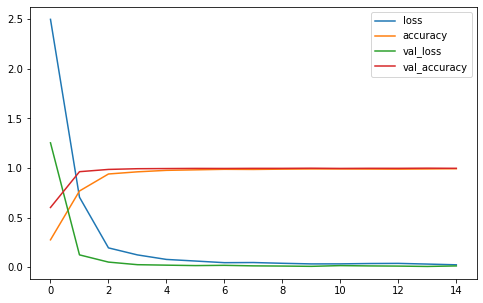

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

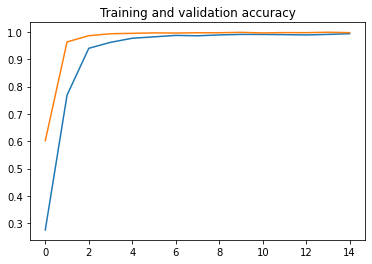

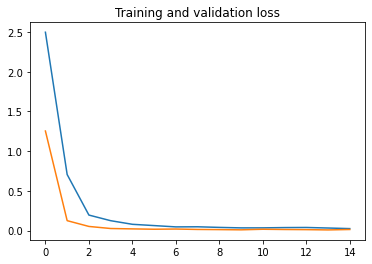

In [25]:
acc = history.history['accuracy']
val_acc = history.history[ 'val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot( epochs, acc )
plt.plot( epochs, val_acc )
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss )
plt.plot(epochs,val_loss )
plt.title('Training and validation loss')

In [26]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in y_pred]

In [27]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":y_pred2})
results

,Filename,Predictions
0,0/00243.png,0
1,0/00252.png,0
2,0/00403.png,0
3,0/00579.png,0
4,0/00675.png,0
...,...,...
12625,42/11842.png,42
12626,42/12019.png,42
12627,42/12098.png,42
12628,42/12276.png,42


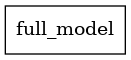

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file="my_model.png", show_shapes=True)

In [29]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [30]:
image_size = (60, 60) 
from tensorflow.keras.preprocessing import image

def predict_image(image_path, show=False):
    
    img = image.load_img(image_path, target_size=image_size)
    img_tensor = image.img_to_array(img)
    
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    
    

    pred = model.predict(img_tensor)
    label = int(np.argmax(pred))
    
    if show and (label in classes.keys()):
        label_class = classes.get(label)
        plt.imshow(img_tensor[0])
        plt.title(f'{label_class}, label: {str(label)}')
        plt.axis('off')
        plt.show()
    return img_tensor, label

In [31]:
labels = []
all_images = []
#Hand chosen images, I picked the one I'm confused at or the hardest anyway to be recongnised.
images = ['11804.png', '02139.png', '02585.png', '01472.png', '00202.png', '00294.png', 
         '01580.png', '01789.png', '01252.png', '00998.png', '00974.png', '00816.png',
         '01213.png', '00362.png', '01533.png', '03311.png', '03359.png', '04042.png',
         '02147.png', '08184.png', '01961.png', '00907.png', '04718.png', '03840.png',
         '01183.png', '01911.png', '05223.png', '01699.png', '03421.png', '07953.png',
         '04070.png', '02152.png', '08000.png', '02953.png', '05292.png', '01157.png',
         '01758.png', '06696.png', '00828.png', '00781.png', '05659.png', '10910.png',
         '09233.png']

correct_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10','11','12','13','14','15','16','17',
                  '18','19','20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', 
                  '33', '34', '35', '36', '37', '38', '39', '40', '41', '42']

correct_labels = np.array(correct_labels)
correct_labels = correct_labels.astype(np.int32)

assert len(correct_labels) == len(images), "Not Equal"

for i in images:
    image_path = root_dir + 'Test/' + i
    img, single_label = predict_image(image_path)
    labels.append(single_label)
    all_images.append(img)
    
print(f' percentage: {(labels == correct_labels).sum()/len(labels)}')

 percentage: 1.0


In [32]:
correct_labels_classes = list(map(classes.get, correct_labels))
labels_classes = list(map(classes.get, labels))
#labels_classes

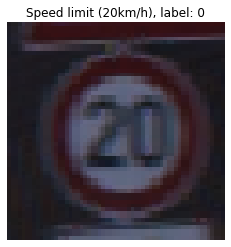

In [33]:
path =  root_dir + 'Test/' + '11804.png'
image111, l1 = predict_image(path, show=True)

In [34]:
def show_images(images, cols = 1, titles = None):

    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: 
        titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure(figsize=(15,15))
    for n, (img, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(np.ceil(n_images/float(cols)), cols, n + 1)
        if img[0].ndim == 2:
            plt.gray()
        plt.imshow(img[0])
        plt.axis('off')
        a.set_title(title)
    plt.subplots_adjust(hspace=0.3, wspace=0)
    plt.show()

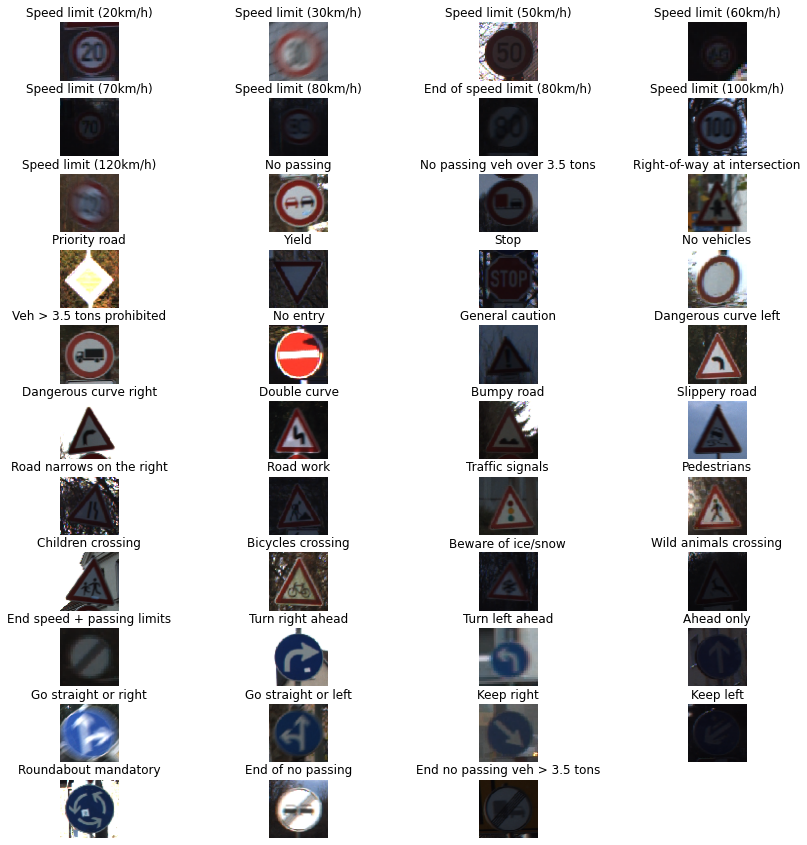

In [35]:
show_images(images=all_images, cols=4, titles=labels_classes)